In [39]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')
plt.style.use('dark_background')

In [27]:
class1 = bernoulli.rvs(p=[0.5, 0.8], size=(100, 2), random_state=0)
class2 = bernoulli.rvs(p=[0.9, 0.2], size=(100, 2), random_state=0)
np.random.seed(0)
np.random.shuffle(class1)
np.random.shuffle(class2)

In [28]:
class1Train = class1[:50]
class1Test = class1[50:]

In [29]:
def getBernoulliMLE(data):
    sum1 = 0
    sum2 = 0
    for i in data:
        sum1 += i[0]
        sum2 += i[1]
    return [sum1/len(data), sum2/len(data)]

In [30]:
class1_mu = getBernoulliMLE(class1Train)

In [31]:
class1_mu

[0.46, 0.76]

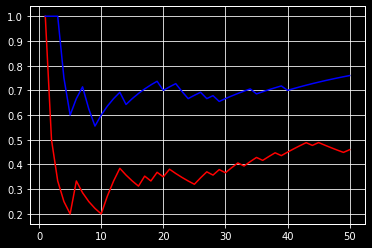

In [32]:
mu1 = []
mu2 = []
for i in range(1, 51):
    mu = getBernoulliMLE(class1Train[:i])
    mu1.append(mu[0])
    mu2.append(mu[1])
plt.plot(np.arange(1, 51), mu1, 'r')
plt.plot(np.arange(1, 51), mu2, 'b')
plt.show()

In [33]:
class2Train = class2[:50]
class2Test = class2[50:]

In [34]:
class2_mu = getBernoulliMLE(class2Train)

In [35]:
class2_mu

[0.9, 0.16]

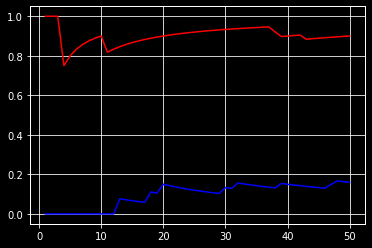

In [36]:
mu1 = []
mu2 = []
for i in range(1, 51):
    mu = getBernoulliMLE(class2Train[:i])
    mu1.append(mu[0])
    mu2.append(mu[1])
plt.plot(np.arange(1, 51), mu1, 'r')
plt.plot(np.arange(1, 51), mu2, 'b')
plt.show()

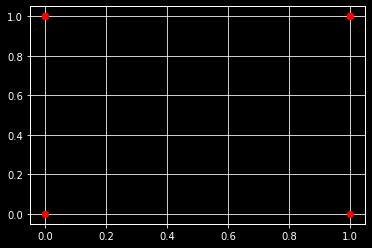

In [37]:
plt.scatter(class1Train[:, 0], class1Train[:, 1], color='r')

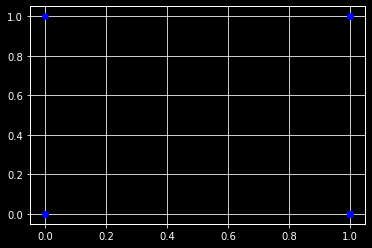

In [38]:
plt.scatter(class2Train[:, 0], class2Train[:, 1], color='b')

In [40]:
def getDiscriminant(point, mu):
    return (point[0]*math.log(mu[0]) + (1-point[0])*math.log(1-mu[0]) + point[1]*math.log(mu[1]) + (1-point[1])*math.log(1-mu[1]))

In [41]:
class1Correct = 0
class2Correct = 0
for i in class1Test:
    g1 = getDiscriminant(i, class1_mu)
    g2 = getDiscriminant(i, class2_mu)
    if g1 > g2:
        class1Correct += 1
for i in class2Test:
    g1 = getDiscriminant(i, class1_mu)
    g2 = getDiscriminant(i, class2_mu)
    if g1 < g2:
        class2Correct += 1

In [42]:
class1Correct, class2Correct

(47, 36)